# <u> Code</u>
    

# The goal of this assignment is three-fold: 

## Enhance the edges of the following image using:
## a) Roberts cross operator (Please read Roberts cross operator from the book)
## b) Sobel’s operator
## c) Apply Laplacian operator in 3x3 window and show the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def padpix(x):
    m,n = x.shape
    x1 = np.zeros((m,n+2),dtype = 'uint8')
    x2 = np.zeros((m+2,n+2),dtype = 'uint8')
    x1[:,1:n+1] = x
    x1[:,0] = x[:,1]
    x1[:,n+1] = x[:,n-2]
    x2[1:m+1,:] = x1
    x2[0,:] = x1[1,:]
    x2[m+1,:] = x1[m-2,:]
    return x2

In [36]:
def padpixRoberts(x):
    m,n = x.shape
    k0 = 3
    x1 = np.zeros((m,n+2*k0), dtype = 'uint8')
    x2 = np.zeros((m+2*k0,n+2*k0), dtype = 'uint8')
    x1[0:m,k0:n+k0] = x
    x1[:,0:k0] = x[:,k0:0:-1]
    x1[:,n-1+k0:n-1+2*k0] = x[:,n-1:n-1-k0:-1]
    x2[k0:m+k0,:] = x1
    x2[0:k0,:] = x1[k0:0:-1,:]
    x2[m-1+k0:m-1+2*k0] = x1[m-1:m-1-k0:-1,:]
    return x2

In [37]:
def convol0(x,h):
    m,n = x.shape
    x1 = np.zeros(x.shape, dtype = 'float')
    for i in range(1,m-1):
        for j in range(1,n-1):
            for ii in range(-1,2):
                for jj in range(-1,2):
                    x1[i,j] += x[i+ii,j+jj]*h[ii+1,jj+1]
    return x1[1:m+1,1:n+1]        

In [38]:
def convolRoberts(x,h):
    k = 3
    mx = np.max(x)
    m1,n1 = x.shape
    k,l = h.shape   
    k1 = k//2
    x1 = np.zeros(x.shape,dtype='float')
    for i in range(k1,m1+k1-1):
        for j in range(k1,n1+k1-1):
            for ii in range (-k1,k1):
                for jj in range (-k1,k1):
                    x1[i,j] += x[i+ii,j+jj]*h[k1+ii,k1+jj]
    mx1 = np.max(x1)
    return np.uint8(x1[k1:m1+k1,k1:n1+k1]*mx/mx1)


In [31]:
def thresh(x,thr):
    xout = np.zeros(x.shape, dtype = 'uint8')
    xout[x>thr] = 255
    return xout

In [32]:
def Gfilter(filter_sz,sig):
    w = np.zeros((filter_sz,filter_sz), dtype = 'float')
    fs = filter_sz//2
    for i in range(-fs,fs):
        for j in range(-fs,fs):
            w[i,j] = 1.0*np.exp(-0.5*(i*i+j*j))/np.sqrt(2*np.pi)/sig
    return w/np.sum(w)

## Filtered Image

43.10907221378113 0.0
(513, 513)


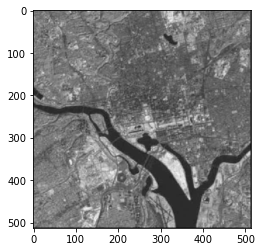

In [33]:
x = plt.imread('washdc512.jpg')
h = Gfilter(15,1.0)
x = convol0(padpix(x),h)
plt.imshow(x,cmap = 'gray')
print(np.max(x),np.min(x))
print(x.shape)

# a) Robert's Operator

In [34]:
def hpfRoberts():
    hv = np.asarray([[1,0],
                     [0,-1]])
    
    hh = np.asarray([[0,1],
                     [-1,0]])
    return hh,hv

(517, 517)


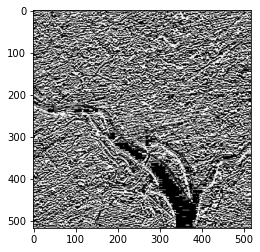

In [39]:
x = plt.imread('washdc512.jpg')
hh,hv = hpfRoberts()
yh = convolRoberts(padpixRoberts(x),hh)
yv = convolRoberts(padpixRoberts(x),hv)
y = np.abs(yh) + np.abs(yv)
plt.imshow(y, cmap = 'gray')
print(y.shape)

255
0 1 0.05639342019766766


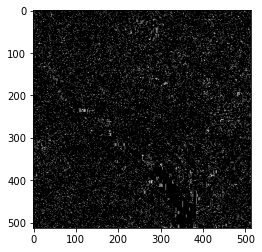

In [23]:
y = y + np.min(y)
print(np.max(y))
y = np.uint8(y*255/np.max(y))
print(np.min(y),np.max(y),np.mean(y))
plt.imshow(y, cmap = 'gray')

## Implementing Threshold

0.05639342019766766 1 0


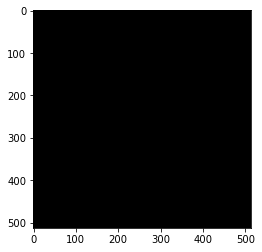

In [24]:
print(np.mean(y),np.max(y),np.min(y))
xx = thresh(y,100)
plt.imshow(xx, cmap = 'gray')

## b) Sobel's Operator

In [13]:
def hpfSobels():
    hv = np.asarray([[1,2,1],
                     [0,0,0],
                     [-1,-2,-1]])
    
    hh = np.asarray([[1,0,-1],
                     [2,0,-2],
                     [1,0,-1]])
    return hh,hv

(513, 513)


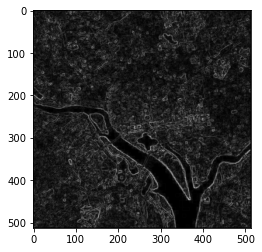

In [14]:
x = plt.imread('washdc512.jpg')
hh,hv = hpfSobels()
yh = convol0(padpix(x),hh)
yv = convol0(padpix(x),hv)
y = np.abs(yh) + np.abs(yv)
plt.imshow(y, cmap = 'gray')
print(y.shape)

318.0
0 255 30.043470165559015


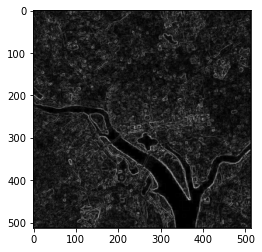

In [15]:
y = y + np.min(y)
print(np.max(y))
y = np.uint8(y*255/np.max(y))
print(np.min(y),np.max(y),np.mean(y))
plt.imshow(y, cmap = 'gray')

## Implementing Threshold

30.043470165559015 255 0


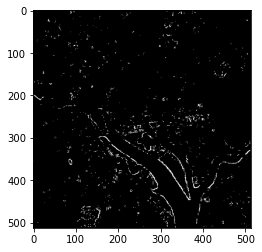

In [16]:
print(np.mean(y),np.max(y),np.min(y))
xx = thresh(y,100)
plt.imshow(xx, cmap = 'gray')

# c) Apply Laplacian operator in 3x3 window and show the results.

In [17]:
def hpfLaplacian():
    hv = np.asarray([[0,1,0],
                     [1,-4,1],
                     [0,1,0]])
    
    hh = np.asarray([[-1,-1,-1],
                     [-1,8,-1],
                     [-1,-1,-1]])
    return hh,hv

(513, 513)


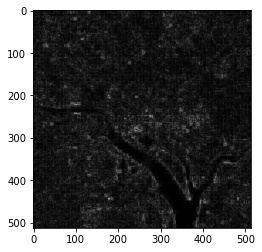

In [18]:
x = plt.imread('washdc512.jpg')
hh,hv = hpfLaplacian()
yh = convol0(padpix(x),hh)
yv = convol0(padpix(x),hv)
y = np.abs(yh) + np.abs(yv)
plt.imshow(y, cmap = 'gray')
print(y.shape)

252.0
0 255 21.310754686152244


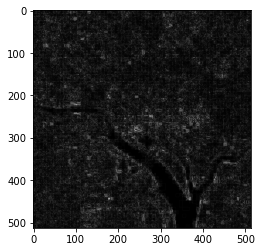

In [19]:
y = y + np.min(y)
print(np.max(y))
y = np.uint8(y*255/np.max(y))
print(np.min(y),np.max(y),np.mean(y))
plt.imshow(y, cmap = 'gray')

## Implementing Threshold

21.310754686152244 255 0


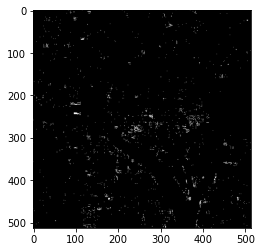

In [20]:
print(np.mean(y),np.max(y),np.min(y))
xx = thresh(y,100)
plt.imshow(xx, cmap = 'gray')